In [55]:
import matplotlib.pyplot as plt
import fastf1
import fastf1.plotting

In [56]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,color_scheme='fastf1')

session = fastf1.get_session(2021, 'Qatar', 'R')
session.load(telemetry=False, weather=False)


core           INFO 	Loading data for Qatar Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	No cached data found for race_control_messages. Loading data...
_api           INFO 	Fetching race control messages...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '14', '11', '31', '18', '55', '16', '4', '5', '10', '3', '22', '7', '99', '47', '63', '9', '6', '77']


In [57]:
session._drivers_results_from_ergast()

,TeamId,DriverId,DriverNumber
DriverNumber,,,
44,mercedes,hamilton,44
33,red_bull,max_verstappen,33
14,alpine,alonso,14
11,red_bull,perez,11
31,alpine,ocon,31
18,aston_martin,stroll,18
55,ferrari,sainz,55
16,ferrari,leclerc,16
4,mclaren,norris,4


req            INFO 	Using cached data for driver_info


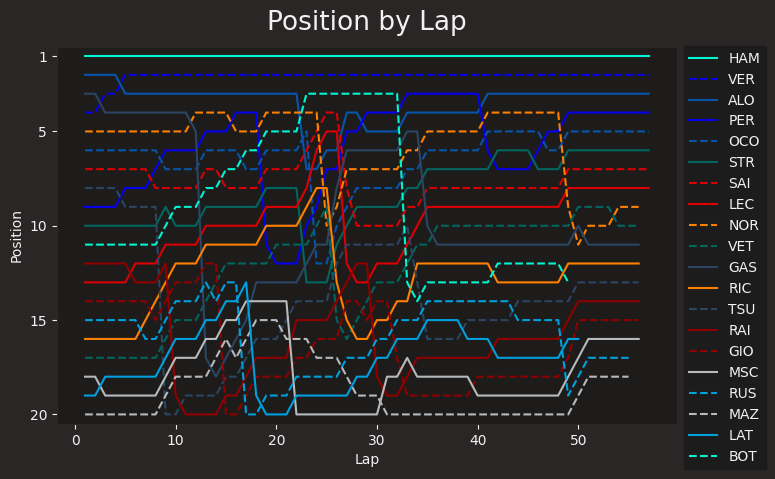

In [58]:
fig, ax = plt.subplots(figsize=(8.0,4.9))
for driver in session.drivers:
    drv_laps = session.laps.pick_driver(driver)
    abbreviated_driver_name = drv_laps["Driver"].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abbreviated_driver_name, style=['color', 'linestyle'], session = session)
    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],label=abbreviated_driver_name, **style)

ax.set_ylabel("Position")
ax.set_xlabel("Lap")
ax.set_title("Position by Lap")
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.legend(bbox_to_anchor=(1.0, 1.02)) 
